In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read files and explore:

In [2]:
train_sales=pd.read_csv('data/sales_train.csv.gz')
train_sales.head(20)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [105]:
item_categories.meta_category.to_dict()

{0: 'PC',
 1: 'Aksessuary',
 2: 'Aksessuary',
 3: 'Aksessuary',
 4: 'Aksessuary',
 5: 'Aksessuary',
 6: 'Aksessuary',
 7: 'Aksessuary',
 8: 'Bilety (Zifra)',
 9: 'Dostavka tovara',
 10: 'Igrovye konsoli',
 11: 'Igrovye konsoli',
 12: 'Igrovye konsoli',
 13: 'Igrovye konsoli',
 14: 'Igrovye konsoli',
 15: 'Igrovye konsoli',
 16: 'Igrovye konsoli',
 17: 'Igrovye konsoli',
 18: 'Igry',
 19: 'Igry',
 20: 'Igry',
 21: 'Igry',
 22: 'Igry',
 23: 'Igry',
 24: 'Igry',
 25: 'Igry',
 26: 'Igry Android',
 27: 'Igry MAC',
 28: 'Igry PC',
 29: 'Igry PC',
 30: 'Igry PC',
 31: 'Igry PC',
 32: 'Karty oplaty (Kino, Muzyka, Igry)',
 33: 'Karty oplaty',
 34: 'Karty oplaty',
 35: 'Karty oplaty',
 36: 'Karty oplaty',
 37: 'Kino',
 38: 'Kino',
 39: 'Kino',
 40: 'Kino',
 41: 'Kino',
 42: 'Knigi',
 43: 'Knigi',
 44: 'Knigi',
 45: 'Knigi',
 46: 'Knigi',
 47: 'Knigi',
 48: 'Knigi',
 49: 'Knigi',
 50: 'Knigi',
 51: 'Knigi',
 52: 'Knigi',
 53: 'Knigi',
 54: 'Knigi',
 55: 'Muzyka',
 56: 'Muzyka',
 57: 'Muzyka',
 58

In [5]:
test_sales=pd.read_csv('data/test.csv.gz')
test_sales.head(10)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
5,5,5,5039
6,6,5,5041
7,7,5,5046
8,8,5,5319
9,9,5,5003


In [19]:
test_sales.describe()

,ID,shop_id,item_id
count,214200.000000,214200.000000,214200.000000
mean,107099.500000,31.642857,11019.398627
std,61834.358168,17.561933,6252.644590
min,0.000000,2.000000,30.000000
25%,53549.750000,16.000000,5381.500000
50%,107099.500000,34.500000,11203.000000
75%,160649.250000,47.000000,16071.500000
max,214199.000000,59.000000,22167.000000


In [4]:
print("train shape",train_sales.shape)
print("test shape",test_sales.shape)

train shape (2935849, 6)
test shape (214200, 3)


In [34]:
print("nbr of shops in the test set",len(train_sales.shop_id.value_counts()))
print("nbr of item per shop",train_sales.shop_id.value_counts())

nbr of shops in the test set 60
nbr of item per shop 31    235636
25    186104
54    143480
28    142234
57    117428
42    109253
27    105366
6      82663
58     71441
56     69573
46     66321
50     65173
19     63911
15     59511
35     58445
21     58133
7      58076
47     56695
26     53910
18     53227
24     53032
53     52921
16     52734
30     50860
29     49225
38     46013
22     45434
51     44433
52     43502
59     42108
41     41967
37     39638
44     39530
43     39282
4      38242
5      38179
14     36979
45     35891
55     34769
12     34694
2      25991
3      25532
17     22950
48     21612
10     21397
13     17824
49     15849
39     13440
0       9857
32      7947
23      6963
34      5752
1       5678
33      5027
40      4257
9       3751
8       3412
20      1792
11       499
36       306
Name: shop_id, dtype: int64


In [35]:
print("nbr of items in the train set",len(train_sales.item_id.value_counts()))
print("nbr of occurence of each item",train_sales.item_id.value_counts())

nbr of items in the train set 21807
nbr of occurence of each item 20949    31340
5822      9408
17717     9067
2808      7479
4181      6853
7856      6602
3732      6475
2308      6320
4870      5811
3734      5805
1855      5681
5821      5389
16787     5283
6675      5122
7894      5107
2445      5056
1830      4976
5823      4974
6497      4904
5272      4853
13071     4804
6740      4675
3183      4615
4178      4527
2416      4487
7893      4380
6466      4324
6498      4278
6503      4274
6457      4269
         ...  
181          1
2647         1
599          1
21074        1
20670        1
601          1
14942        1
4278         1
596          1
595          1
19010        1
594          1
16255        1
7731         1
588          1
2636         1
184          1
21060        1
18290        1
4684         1
590          1
21061        1
183          1
15913        1
3628         1
593          1
13866        1
16574        1
20668        1
0            1
Name: item_id, Leng

=> not all items are present in the train set.

In [29]:
print("nbr of shops in the test set",len(test_sales.shop_id.value_counts()))
print("nbr of item per shop",test_sales.shop_id.value_counts()[:1].values[0])

nbr of shops in the test set 42
nbr of item per shop 5100


In [32]:
print("nbr of items in the test set",len(test_sales.item_id.value_counts()))
print("nbr of occurence of each item",test_sales.item_id.value_counts()[:1].values[0])

nbr of items in the test set 5100
nbr of occurence of each item 42


=> In the test set, we have 42 shops. Each one, contains 5100 items.

In [37]:
items=pd.read_csv('data/items.csv')
shops=pd.read_csv('data/shops.csv')
item_categories=pd.read_csv('data/item_categories.csv')

In [6]:
print(items.shape)
items.head(10)

(22170, 3)


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


### find duplicated rows

In [45]:
# by default, the duplicated() function leave only first occurence of a duplicated row 
print('Number of duplicates:', len(train_sales[train_sales.duplicated()]))

Number of duplicates: 6


In [11]:
# see all duplicated rows
train_sales[train_sales.duplicated(keep=False)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76961,05.01.2013,0,54,20130,149.0,1.0
76962,05.01.2013,0,54,20130,149.0,1.0
1435365,23.02.2014,13,50,3423,999.0,1.0
1435367,23.02.2014,13,50,3423,999.0,1.0
1496765,23.03.2014,14,21,3423,999.0,1.0
1496766,23.03.2014,14,21,3423,999.0,1.0
1671872,01.05.2014,16,50,3423,999.0,1.0
1671873,01.05.2014,16,50,3423,999.0,1.0
1866322,12.07.2014,18,25,3423,999.0,1.0
1866340,12.07.2014,18,25,3423,999.0,1.0


In [15]:
# remove duplicated rows
train_sales=train_sales[~train_sales.duplicated()]

0

# explore information related to items:

In [8]:
train_sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


=> some items have negative values of item cnt day

In [12]:
print(train_sales[train_sales.item_cnt_day<0].item_cnt_day.value_counts())
print(train_sales[train_sales.item_cnt_day<0].item_cnt_day.count())

-1.0     7252
-2.0       78
-3.0       14
-5.0        4
-4.0        3
-6.0        2
-9.0        1
-16.0       1
-22.0       1
Name: item_cnt_day, dtype: int64
7356


This is strange. There are 7356 items having negative value of item count per day.

### total nbr of items:

In [17]:
items.describe()

,item_id,item_category_id
count,22170.00000,22170.000000
mean,11084.50000,46.290753
std,6400.07207,15.941486
min,0.00000,0.000000
25%,5542.25000,37.000000
50%,11084.50000,40.000000
75%,16626.75000,58.000000
max,22169.00000,83.000000


=> there are 22170 different items from 84 category.

In the test set we have 5100 item.

### how many item do we have per month:

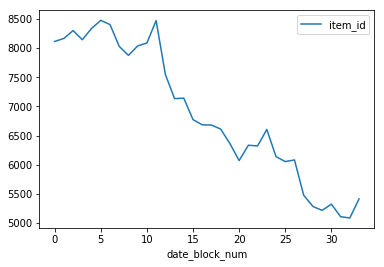

In [14]:
train_sales.pivot_table(index='date_block_num',values='item_id',aggfunc=lambda x: len(x.unique())).plot()

In [20]:
train_sales.pivot_table(index='date_block_num',values='item_id',aggfunc=lambda x: len(x.unique()))[25:]

,item_id
date_block_num,
25,6053
26,6082
27,5476
28,5283
29,5216
30,5323
31,5108
32,5085
33,5413


=> the nbr of unique items is decreasing over time. why?

In [18]:
len(test_sales.item_id.value_counts())

5100

in the test set, we have almost the same nbr of items in the past 7 months(around 5100 from month nbr 27 to month nbr 33) 

### nbr of shops per month

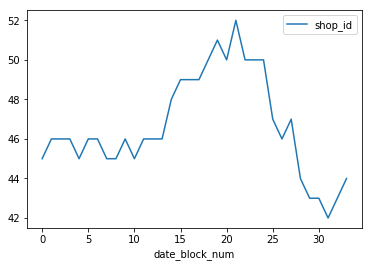

In [15]:
train_sales.pivot_table(index='date_block_num',values='shop_id',aggfunc=lambda x: len(x.unique())).plot()

=> the nbr of unique shops is decreasing in the last months.

In [26]:
train_sales.pivot_table(index='date_block_num',values='shop_id',aggfunc=lambda x: len(x.unique()))[25:]

,shop_id
date_block_num,
25,47
26,46
27,47
28,44
29,43
30,43
31,42
32,43
33,44


In [29]:
len(test_sales.shop_id.unique())

42

nbr of shops in the test sets is close to the nbr of shops in the last months of the training set.

In [18]:
shops.describe()

,shop_id
count,60.000000
mean,29.500000
std,17.464249
min,0.000000
25%,14.750000
50%,29.500000
75%,44.250000
max,59.000000


=> we have 60 shops in total

# exploring price feature

In [37]:
train_sales.item_price.value_counts()

299.000000     291352
399.000000     242603
149.000000     218432
199.000000     184044
349.000000     101461
599.000000      95673
999.000000      82784
799.000000      77882
249.000000      77685
699.000000      76493
499.000000      73078
899.000000      57156
1199.000000     55448
1999.000000     49672
99.000000       48955
2599.000000     47857
1499.000000     47196
449.000000      43205
549.000000      39080
5.000000        29702
2999.000000     28929
1299.000000     22381
169.000000      20848
1699.000000     18924
1099.000000     17645
749.000000      17351
1799.000000     17292
2499.000000     16713
1399.000000     15694
1599.000000     14293
                ...  
321.166667          1
599.520000          1
6298.000000         1
1012.782500         1
1176.600000         1
1175.462500         1
1169.025000         1
326.666667          1
226.150000          1
346.666667          1
2094.238095         1
852.198889          1
1252.150000         1
169.280000          1
6399.50000

In [38]:
train_sales.item_price.max()

307980.0

In [39]:
train_sales[train_sales.item_price==train_sales.item_price.max()]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


In [40]:
items[items.item_id==6066]

,item_name,item_id,item_category_id
6066,Radmin 3 - 522 лиц.,6066,75


=> Radmin: Reliable Remote Support Software for IT Pros. 308k fir such a product seems to be very expensive.

In [50]:
train_sales[train_sales.item_price>30000].item_cnt_day.value_counts()

 1.0    226
 2.0     11
-1.0      2
 5.0      1
Name: item_cnt_day, dtype: int64

=> the frequency of ordering expensive items is low. So, the price can be very helpful to determine how many time this item will be ordered per month

In [31]:
test_sales[test_sales.item_id==6066]

,ID,shop_id,item_id


=> the outlier item doesn't exist in the test set

# understand item categories

In [38]:
item_categories

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


## translate item categories 

In [39]:
# https://stackoverflow.com/questions/14173421/use-string-translate-in-python-to-transliterate-cyrillic
# words are written in cyrillic(russian alphabet). We need to translate them into english alphabet in order to understand their meaning
symbols=(u"абвгдеёжзийклмнопрстуфхцчшщъыьэюяАБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ", u"abvgdeejzijklmnoprstufhzcss_y_euaABVGDEEJZIJKLMNOPRSTUFHZCSS_Y_EUA")
english = {ord(a):ord(b) for a, b in zip(*symbols)}

item_categories['items_english'] = item_categories['item_category_name'].apply(lambda x: x.translate(english))

print(item_categories.items_english.head(100))

0                      PC - Garnitury/Nausniki
1                             Aksessuary - PS2
2                             Aksessuary - PS3
3                             Aksessuary - PS4
4                             Aksessuary - PSP
5                          Aksessuary - PSVita
6                        Aksessuary - XBOX 360
7                        Aksessuary - XBOX ONE
8                               Bilety (Zifra)
9                              Dostavka tovara
10                       Igrovye konsoli - PS2
11                       Igrovye konsoli - PS3
12                       Igrovye konsoli - PS4
13                       Igrovye konsoli - PSP
14                    Igrovye konsoli - PSVita
15                  Igrovye konsoli - XBOX 360
16                  Igrovye konsoli - XBOX ONE
17                    Igrovye konsoli - Procie
18                                  Igry - PS2
19                                  Igry - PS3
20                                  Igry - PS4
21           

here we discovered that item category name is composed from a category and a subcategory.

=> So, we can generate sub category as a feature.

In [40]:
#Split the metacategories with the "-"
item_categories["meta_category"]=item_categories.items_english.apply(lambda x:x.split(" - ")[0])
print(item_categories.meta_category.head(100))

0                            PC
1                    Aksessuary
2                    Aksessuary
3                    Aksessuary
4                    Aksessuary
5                    Aksessuary
6                    Aksessuary
7                    Aksessuary
8                Bilety (Zifra)
9               Dostavka tovara
10              Igrovye konsoli
11              Igrovye konsoli
12              Igrovye konsoli
13              Igrovye konsoli
14              Igrovye konsoli
15              Igrovye konsoli
16              Igrovye konsoli
17              Igrovye konsoli
18                         Igry
19                         Igry
20                         Igry
21                         Igry
22                         Igry
23                         Igry
24                         Igry
25                         Igry
26                 Igry Android
27                     Igry MAC
28                      Igry PC
29                      Igry PC
                ...            
54      

In [41]:
item_categories.head()

,item_category_name,item_category_id,items_english,meta_category
0,PC - Гарнитуры/Наушники,0,PC - Garnitury/Nausniki,PC
1,Аксессуары - PS2,1,Aksessuary - PS2,Aksessuary
2,Аксессуары - PS3,2,Aksessuary - PS3,Aksessuary
3,Аксессуары - PS4,3,Aksessuary - PS4,Aksessuary
4,Аксессуары - PSP,4,Aksessuary - PSP,Aksessuary


In [42]:
item_categories.to_csv('item_categories_with_generated_features.csv',index=False)

In [66]:
print(item_categories.meta_category.unique())
print("nbr of unique metacategory",item_categories.meta_category.nunique())
print("metacategory value counts",item_categories.meta_category.value_counts())

['PC' 'Aksessuary' 'Bilety (Zifra)' 'Dostavka tovara' 'Igrovye konsoli'
 'Igry' 'Igry Android' 'Igry MAC' 'Igry PC'
 'Karty oplaty (Kino, Muzyka, Igry)' 'Karty oplaty' 'Kino' 'Knigi'
 'Muzyka' 'Podarki' 'Programmy' 'Slujebnye' 'Cistye nositeli (spil_)'
 'Cistye nositeli (stucnye)' 'Elementy pitania']
nbr of unique metacategory 20
metacategory value counts Knigi                                13
Podarki                              12
Igry                                  8
Igrovye konsoli                       8
Aksessuary                            7
Muzyka                                6
Programmy                             6
Kino                                  5
Karty oplaty                          4
Igry PC                               4
Slujebnye                             2
Elementy pitania                      1
Cistye nositeli (spil_)               1
Igry Android                          1
Dostavka tovara                       1
Cistye nositeli (stucnye)             1
PC

# investigating shops

In [67]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


### translate shop names

In [7]:
shops['shops_english'] = shops['shop_name'].apply(lambda x: x.translate(english))
print(shops.shops_english.head(100))

0                       !Akutsk Ordjonikidze, 56 fran
1                       !Akutsk TZ "Zentral_nyj" fran
2                                    Adygea TZ "Mega"
3                      Balasiha TRK "Oktabr_-Kinomir"
4                            Voljskij TZ "Volga Moll"
5                              Vologda TRZ "Marmelad"
6                          Voronej (Plehanovskaa, 13)
7                              Voronej TRZ "Maksimir"
8                        Voronej TRZ Siti-Park "Grad"
9                                   Vyezdnaa Torgovla
10                         Jukovskij ul. Ckalova 39m?
11                         Jukovskij ul. Ckalova 39m²
12                                Internet-magazin CS
13                                Kazan_ TZ "Behetle"
14                            Kazan_ TZ "ParkHaus" II
15                               Kaluga TRZ "XXI vek"
16                                   Kolomna TZ "Rio"
17                      Krasnoarsk TZ "Vzletka Plaza"
18                          

it seems that the first word correspond to the town of the shop.

=> let's generate the feature

In [8]:
shops["town"]=shops.shops_english.apply(lambda x:x.split()[0])
print(shops.town.nunique())
print(shops.town.value_counts())

32
Moskva              13
Voronej              3
RostovNaDonu         3
Tumen_               3
Akutsk               2
Novosibirsk          2
Kazan_               2
Krasnoarsk           2
!Akutsk              2
Ufa                  2
Jukovskij            2
N.Novgorod           2
Samara               2
SPb                  2
Voljskij             1
Himki                1
Adygea               1
Cehov                1
Kursk                1
Kolomna              1
Zifrovoj             1
Omsk                 1
Vyezdnaa             1
Kaluga               1
Mytisi               1
Vologda              1
Surgut               1
Balasiha             1
Aroslavl_            1
Tomsk                1
Sergiev              1
Internet-magazin     1
Name: town, dtype: int64


- most of the shops(13) are in Moskva (Moscow)
There is probably an online shop called Internet-magazin.

In [127]:
# While doing this and researching cities next idea: Another makro feature of "regions" eg Balashiha belongs to moscow region
shops["region"]=["Sakha","Sakha","Adygea","Moscow","Volgograd", "Vologda", "voronezh","voronezh","voronezh","Vyezdnaa", "Moscow", "Moscow","Internet", "tatarstan", "tatarstan","Kaluga", "Moscow", "Moscow", "Moscow", "Kursk", "Moscow", "Moscow", "Moscow", "Moscow", "Moscow", "Moscow", "Moscow", "Moscow", "Moscow", "Moscow", "Moscow", "Moscow", "Moscow","Moscow","novgorod","novgorod","novosibirsk","novosibirsk","omsk","rostov","rostov","rostov","Saint Peterburg","Saint Peterburg","samara","samara","Moscow","Khanty-Mansi","Tomsk","Tyumen","tyumen","tyumen","Bashkortostan","Bashkortostan","Moscow","zifrovoj","Moscow","sakha","sakha","yaroslavl"]
shops.head()

,shop_name,shop_id,shops_english,town,region
0,"!Якутск Орджоникидзе, 56 фран",0,"!Akutsk Ordjonikidze, 56 fran",!Akutsk,Sakha
1,"!Якутск ТЦ ""Центральный"" фран",1,"!Akutsk TZ ""Zentral_nyj"" fran",!Akutsk,Sakha
2,"Адыгея ТЦ ""Мега""",2,"Adygea TZ ""Mega""",Adygea,Adygea
3,"Балашиха ТРК ""Октябрь-Киномир""",3,"Balasiha TRK ""Oktabr_-Kinomir""",Balasiha,Moscow
4,"Волжский ТЦ ""Волга Молл""",4,"Voljskij TZ ""Volga Moll""",Voljskij,Volgograd


In [77]:
shops.to_csv('shops_with_generated_features.csv',index=False)

In [32]:
shops=pd.read_csv('shops_with_generated_features.csv')
shops.head()

,shop_name,shop_id,shops_english,town,region
0,"!Якутск Орджоникидзе, 56 фран",0,"!Akutsk Ordjonikidze, 56 fran",!Akutsk,Sakha
1,"!Якутск ТЦ ""Центральный"" фран",1,"!Akutsk TZ ""Zentral_nyj"" fran",!Akutsk,Sakha
2,"Адыгея ТЦ ""Мега""",2,"Adygea TZ ""Mega""",Adygea,Adygea
3,"Балашиха ТРК ""Октябрь-Киномир""",3,"Balasiha TRK ""Oktabr_-Kinomir""",Balasiha,Moscow
4,"Волжский ТЦ ""Волга Молл""",4,"Voljskij TZ ""Volga Moll""",Voljskij,Volgograd


# focus on training set

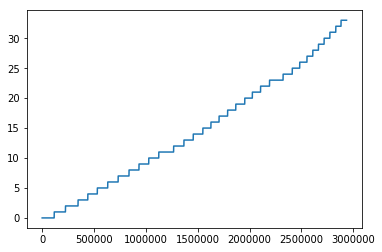

In [81]:
# check if data is sorted by date
train_sales.date_block_num.plot()

### extract time information

In [33]:
train_sales['day'] = pd.to_datetime(train_sales['date'], format = '%d.%m.%Y').dt.day
train_sales['month'] = pd.to_datetime(train_sales['date'], format = '%d.%m.%Y').dt.month
train_sales['year'] = pd.to_datetime(train_sales['date'], format = '%d.%m.%Y').dt.year
#Series.dt.dayofweek The day of the week with Monday=0, Sunday=6
train_sales['weekday'] = pd.to_datetime(train_sales['date'], format = '%d.%m.%Y').dt.dayofweek 
train_sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,weekday
0,02.01.2013,0,59,22154,999.00,1.0,2,1,2013,2
1,03.01.2013,0,25,2552,899.00,1.0,3,1,2013,3
2,05.01.2013,0,25,2552,899.00,-1.0,5,1,2013,5
3,06.01.2013,0,25,2554,1709.05,1.0,6,1,2013,6
4,15.01.2013,0,25,2555,1099.00,1.0,15,1,2013,1


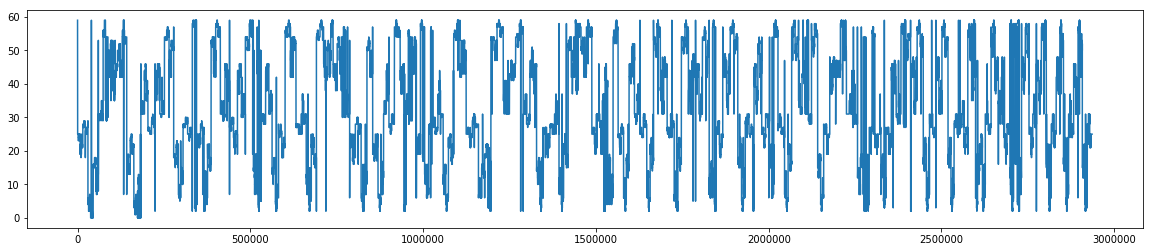

In [34]:
# how shops appear in the trainset
train_sales.shop_id.plot(figsize=(20,4))

it seems that there is a rythm in how shops appear

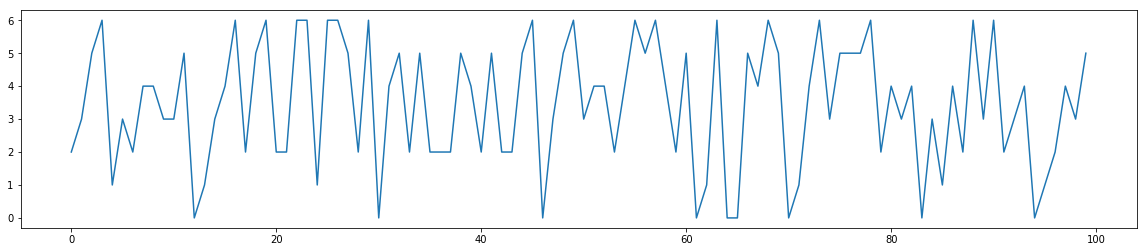

In [86]:
train_sales.weekday[0:100].plot(figsize=(20,4))

Aha. Order of train set is by
- month
- shops per month
- item_id per shop
- dates of items per shop

In [89]:
train_sales.iloc[1500:2000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,weekday
1500,11.01.2013,0,25,3620,299.0,2.0,11,1,2013,4
1501,17.01.2013,0,25,3620,299.0,1.0,17,1,2013,3
1502,21.01.2013,0,25,3620,299.0,1.0,21,1,2013,0
1503,02.01.2013,0,25,3622,299.0,1.0,2,1,2013,2
1504,07.01.2013,0,25,3622,299.0,2.0,7,1,2013,0
1505,11.01.2013,0,25,3622,299.0,4.0,11,1,2013,4
1506,14.01.2013,0,25,3622,299.0,1.0,14,1,2013,0
1507,21.01.2013,0,25,3622,299.0,1.0,21,1,2013,0
1508,05.01.2013,0,25,3624,299.0,1.0,5,1,2013,5
1509,17.01.2013,0,25,3577,299.0,1.0,17,1,2013,3


# merge trainset with items and shops datasets

In [95]:
item_categories.head()

,item_category_name,item_category_id,items_english,meta_category
0,PC - Гарнитуры/Наушники,0,PC - Garnitury/Nausniki,PC
1,Аксессуары - PS2,1,Aksessuary - PS2,Aksessuary
2,Аксессуары - PS3,2,Aksessuary - PS3,Aksessuary
3,Аксессуары - PS4,3,Aksessuary - PS4,Aksessuary
4,Аксессуары - PSP,4,Aksessuary - PSP,Aksessuary


In [101]:
train_sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,weekday
0,02.01.2013,0,59,22154,999.00,1.0,2,1,2013,2
1,03.01.2013,0,25,2552,899.00,1.0,3,1,2013,3
2,05.01.2013,0,25,2552,899.00,-1.0,5,1,2013,5
3,06.01.2013,0,25,2554,1709.05,1.0,6,1,2013,6
4,15.01.2013,0,25,2555,1099.00,1.0,15,1,2013,1


In [102]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [103]:
item_categories.head()

,item_category_name,item_category_id,items_english,meta_category
0,PC - Гарнитуры/Наушники,0,PC - Garnitury/Nausniki,PC
1,Аксессуары - PS2,1,Aksessuary - PS2,Aksessuary
2,Аксессуары - PS3,2,Aksessuary - PS3,Aksessuary
3,Аксессуары - PS4,3,Aksessuary - PS4,Aksessuary
4,Аксессуары - PSP,4,Aksessuary - PSP,Aksessuary


In [43]:
train_sales=train_sales.merge(items,how='left')
train_sales=train_sales.merge(item_categories,how='left')
train_sales=train_sales.merge(shops,how='left')
train_sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,weekday,item_name,item_category_id,item_category_name,items_english,meta_category,shop_name
0,02.01.2013,0,59,22154,999.00,1.0,2,1,2013,2,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Kino - Blu-Ray,Kino,"Ярославль ТЦ ""Альтаир"""
1,03.01.2013,0,25,2552,899.00,1.0,3,1,2013,3,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,Muzyka - Vinil,Muzyka,"Москва ТРК ""Атриум"""
2,05.01.2013,0,25,2552,899.00,-1.0,5,1,2013,5,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,Muzyka - Vinil,Muzyka,"Москва ТРК ""Атриум"""
3,06.01.2013,0,25,2554,1709.05,1.0,6,1,2013,6,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,Muzyka - Vinil,Muzyka,"Москва ТРК ""Атриум"""
4,15.01.2013,0,25,2555,1099.00,1.0,15,1,2013,1,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,Muzyka - CD firmennogo proizvodstva,Muzyka,"Москва ТРК ""Атриум"""


In [56]:
train_sales.drop(columns=["item_name","shop_name","item_category_name"],inplace=True)

train_sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,weekday,item_category_id,items_english,meta_category,shop_name,shops_english,town,region
0,02.01.2013,0,59,22154,999.00,1.0,2,1,2013,2,37,Kino - Blu-Ray,Kino,"Ярославль ТЦ ""Альтаир""","Aroslavl_ TZ ""Al_tair""",Aroslavl_,yaroslavl
1,03.01.2013,0,25,2552,899.00,1.0,3,1,2013,3,58,Muzyka - Vinil,Muzyka,"Москва ТРК ""Атриум""","Moskva TRK ""Atrium""",Moskva,Moscow
2,05.01.2013,0,25,2552,899.00,-1.0,5,1,2013,5,58,Muzyka - Vinil,Muzyka,"Москва ТРК ""Атриум""","Moskva TRK ""Atrium""",Moskva,Moscow
3,06.01.2013,0,25,2554,1709.05,1.0,6,1,2013,6,58,Muzyka - Vinil,Muzyka,"Москва ТРК ""Атриум""","Moskva TRK ""Atrium""",Moskva,Moscow
4,15.01.2013,0,25,2555,1099.00,1.0,15,1,2013,1,56,Muzyka - CD firmennogo proizvodstva,Muzyka,"Москва ТРК ""Атриум""","Moskva TRK ""Atrium""",Moskva,Moscow


In [47]:
# remove duplicates
train_sales=train_sales[~train_sales.duplicated()]

In [106]:
train_sales.isnull().values.any()

False

In [57]:
train_sales.to_csv('train_sales_joined_with_shops_and_items.csv',index=False)

### nbr of sold item per year

In [109]:
train_sales.groupby('year').agg({'item_cnt_day':'sum'})

,item_cnt_day
year,
2013,1562733.0
2014,1320889.0
2015,764584.0


=> sales are decreasing over time.

we should also take into account that November and december are exluded from 2015

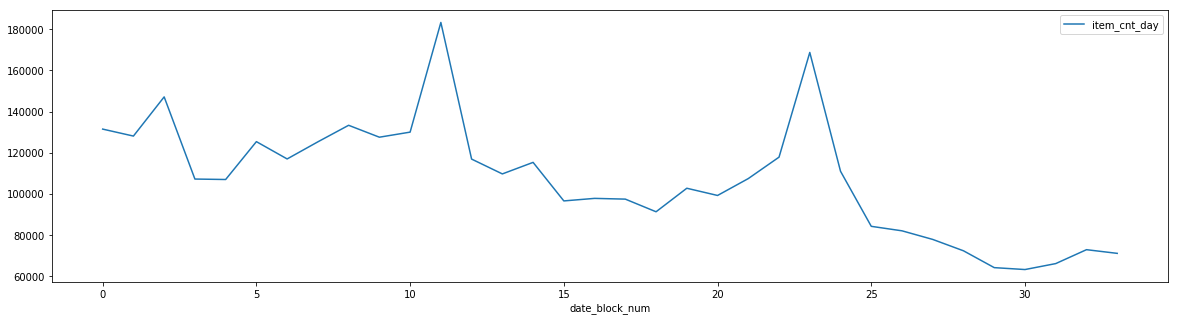

In [111]:
train_sales.groupby('date_block_num').agg({'item_cnt_day':'sum'}).plot(figsize=(20,5))

In [48]:
train_sales.groupby('date_block_num').agg({'item_cnt_day':'sum'})

,item_cnt_day
date_block_num,
0,131478.0
1,128090.0
2,147142.0
3,107190.0
4,106970.0
5,125381.0
6,116966.0
7,125291.0
8,133332.0


=> November is usually similar to october with slight increase in the sales rate.

### 2013

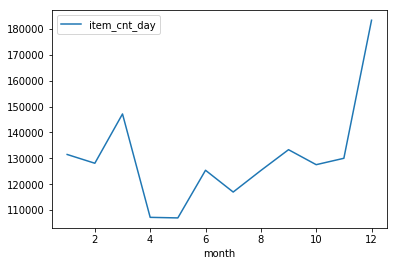

In [114]:
train_sales[train_sales.year==2013].groupby('month').agg({'item_cnt_day':'sum'}).plot()

### 2014

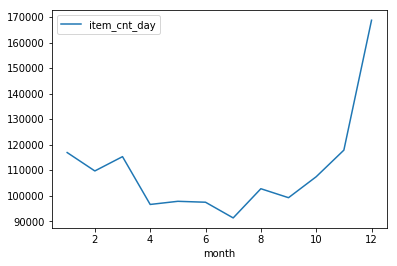

In [116]:
train_sales[train_sales.year==2014].groupby('month').agg({'item_cnt_day':'sum'}).plot()

### 2015

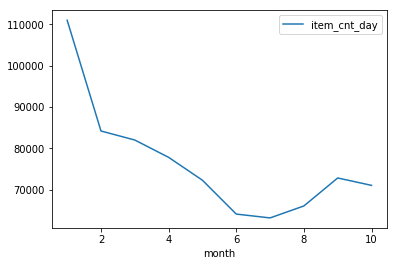

In [117]:
train_sales[train_sales.year==2015].groupby('month').agg({'item_cnt_day':'sum'}).plot()

### variation of sales according to the day of the week:

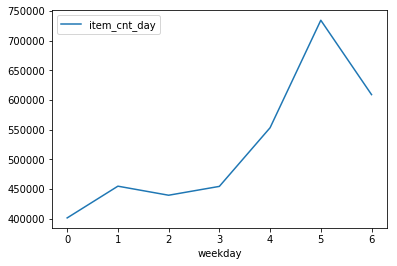

In [119]:
#Monday is 0 and Sunday is 6
train_sales.groupby('weekday').agg({'item_cnt_day':'sum'}).plot()

Monday is 0 and Sunday is 6

sales increase significantly on friday and saturday. we should take that into account.

# count nbr of sunday,friday and saturday in the month. we can add this feature

In [71]:
from calendar import weekday, monthrange, SUNDAY,FRIDAY,SATURDAY

y, m = 2013, 6
for m in range(1,13):
    days = [weekday(y, m, d+1) for d in range(*monthrange(y, m))]
    print(days.count(SUNDAY)+days.count(SATURDAY)+days.count(FRIDAY))

12
9
12
12
13
12
12
12
11
12
11
11


### Sales by shop

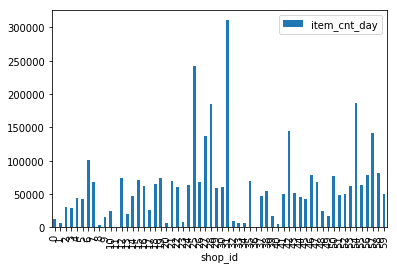

In [121]:
train_sales.groupby('shop_id').agg({'item_cnt_day':'sum'}).plot(kind='bar')

=> sales are very different from one shop to another

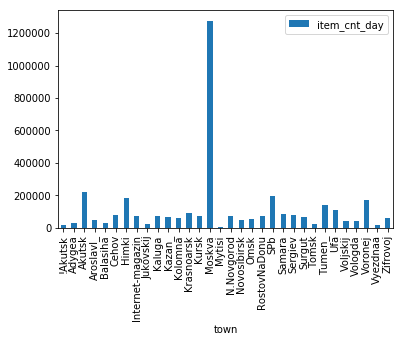

In [123]:
train_sales.groupby("town").agg({'item_cnt_day':'sum'}).plot(kind='bar')

shops in moscow are the most successful.

### Sales per item category

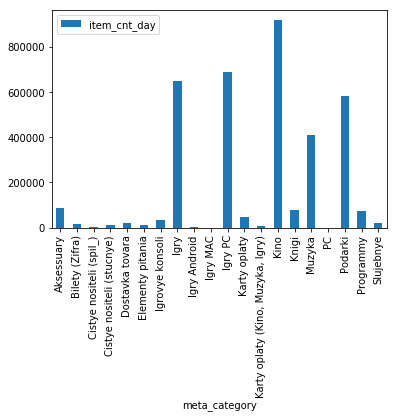

In [129]:
train_sales.groupby("meta_category").agg({'item_cnt_day':'sum'}).plot(kind='bar')

In [124]:
train_sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,weekday,item_category_id,items_english,meta_category,shops_english,town,region
0,02.01.2013,0,59,22154,999.00,1.0,2,1,2013,2,37,Kino - Blu-Ray,Kino,"Aroslavl_ TZ ""Al_tair""",Aroslavl_,yaroslavl
1,03.01.2013,0,25,2552,899.00,1.0,3,1,2013,3,58,Muzyka - Vinil,Muzyka,"Moskva TRK ""Atrium""",Moskva,Moscow
2,05.01.2013,0,25,2552,899.00,-1.0,5,1,2013,5,58,Muzyka - Vinil,Muzyka,"Moskva TRK ""Atrium""",Moskva,Moscow
3,06.01.2013,0,25,2554,1709.05,1.0,6,1,2013,6,58,Muzyka - Vinil,Muzyka,"Moskva TRK ""Atrium""",Moskva,Moscow
4,15.01.2013,0,25,2555,1099.00,1.0,15,1,2013,1,56,Muzyka - CD firmennogo proizvodstva,Muzyka,"Moskva TRK ""Atrium""",Moskva,Moscow


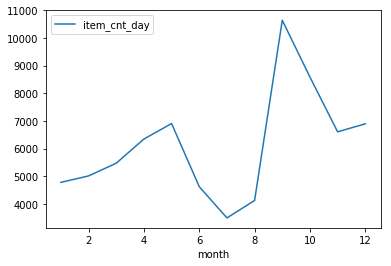

In [15]:
train_sales[train_sales.town=='Internet-magazin'].groupby('month').agg({'item_cnt_day':'sum'}).plot()

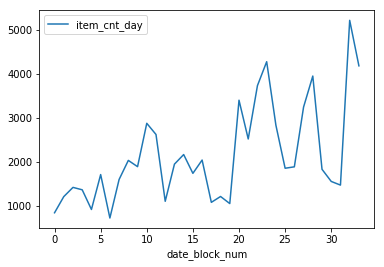

In [16]:
train_sales[train_sales.town=='Internet-magazin'].groupby('date_block_num').agg({'item_cnt_day':'sum'}).plot()

=> online sales are increasing over time.

### sales per shop

In [18]:
train_sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,weekday,item_category_id,items_english,meta_category,shops_english,town
0,02.01.2013,0,59,22154,999.00,1.0,2,1,2013,2,37,Kino - Blu-Ray,Kino,"Aroslavl_ TZ ""Al_tair""",Aroslavl_
1,03.01.2013,0,25,2552,899.00,1.0,3,1,2013,3,58,Muzyka - Vinil,Muzyka,"Moskva TRK ""Atrium""",Moskva
2,05.01.2013,0,25,2552,899.00,-1.0,5,1,2013,5,58,Muzyka - Vinil,Muzyka,"Moskva TRK ""Atrium""",Moskva
3,06.01.2013,0,25,2554,1709.05,1.0,6,1,2013,6,58,Muzyka - Vinil,Muzyka,"Moskva TRK ""Atrium""",Moskva
4,15.01.2013,0,25,2555,1099.00,1.0,15,1,2013,1,56,Muzyka - CD firmennogo proizvodstva,Muzyka,"Moskva TRK ""Atrium""",Moskva


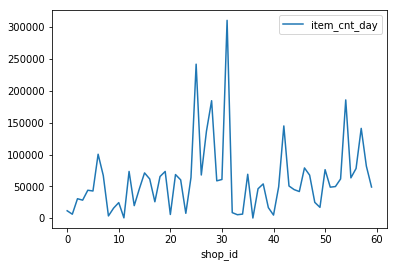

In [20]:
train_sales.groupby('shop_id').agg({'item_cnt_day':'sum','shops_english':'first'}).plot()

Sales are very different from one shope to another

### study the evolution of prices:

In [21]:
train_sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,weekday,item_category_id,items_english,meta_category,shops_english,town
0,02.01.2013,0,59,22154,999.00,1.0,2,1,2013,2,37,Kino - Blu-Ray,Kino,"Aroslavl_ TZ ""Al_tair""",Aroslavl_
1,03.01.2013,0,25,2552,899.00,1.0,3,1,2013,3,58,Muzyka - Vinil,Muzyka,"Moskva TRK ""Atrium""",Moskva
2,05.01.2013,0,25,2552,899.00,-1.0,5,1,2013,5,58,Muzyka - Vinil,Muzyka,"Moskva TRK ""Atrium""",Moskva
3,06.01.2013,0,25,2554,1709.05,1.0,6,1,2013,6,58,Muzyka - Vinil,Muzyka,"Moskva TRK ""Atrium""",Moskva
4,15.01.2013,0,25,2555,1099.00,1.0,15,1,2013,1,56,Muzyka - CD firmennogo proizvodstva,Muzyka,"Moskva TRK ""Atrium""",Moskva


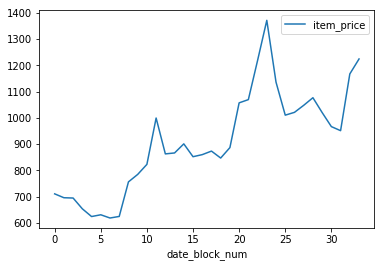

In [25]:
train_sales.groupby('date_block_num').agg({'item_price':'mean'}).plot()

=> prices are increasing over time. We can notice a seveare inflation at the end of 2014(November and decembre 2014). We should take that into consideration while training our model.

# understand shop life

In [90]:
shop_life=pd.DataFrame(columns=['shop_id','start','end'])
shop_life['shop_id']=np.arange(60)
shop_life['start']=train_sales.groupby('shop_id').agg({'date_block_num':'min'})
shop_life['end']=train_sales.groupby('shop_id').agg({'date_block_num':'max'})
shop_life['present_in_test_set']=shop_life.shop_id.isin(test_sales.shop_id.unique()).astype(int)
shop_life=shop_life.merge(shops,how='left').drop('shop_name',axis=1)
shop_life.head(60)

,shop_id,start,end,present_in_test_set,shops_english,town,region
0,0,0,1,0,"!Akutsk Ordjonikidze, 56 fran",!Akutsk,Sakha
1,1,0,1,0,"!Akutsk TZ ""Zentral_nyj"" fran",!Akutsk,Sakha
2,2,0,33,1,"Adygea TZ ""Mega""",Adygea,Adygea
3,3,0,33,1,"Balasiha TRK ""Oktabr_-Kinomir""",Balasiha,Moscow
4,4,0,33,1,"Voljskij TZ ""Volga Moll""",Voljskij,Volgograd
5,5,1,33,1,"Vologda TRZ ""Marmelad""",Vologda,Vologda
6,6,0,33,1,"Voronej (Plehanovskaa, 13)",Voronej,voronezh
7,7,0,33,1,"Voronej TRZ ""Maksimir""",Voronej,voronezh
8,8,0,3,0,"Voronej TRZ Siti-Park ""Grad""",Voronej,voronezh
9,9,9,33,0,Vyezdnaa Torgovla,Vyezdnaa,Vyezdnaa


In [91]:
shop_life[shop_life.present_in_test_set==1]

,shop_id,start,end,present_in_test_set,shops_english,town,region
2,2,0,33,1,"Adygea TZ ""Mega""",Adygea,Adygea
3,3,0,33,1,"Balasiha TRK ""Oktabr_-Kinomir""",Balasiha,Moscow
4,4,0,33,1,"Voljskij TZ ""Volga Moll""",Voljskij,Volgograd
5,5,1,33,1,"Vologda TRZ ""Marmelad""",Vologda,Vologda
6,6,0,33,1,"Voronej (Plehanovskaa, 13)",Voronej,voronezh
7,7,0,33,1,"Voronej TRZ ""Maksimir""",Voronej,voronezh
10,10,0,33,1,Jukovskij ul. Ckalova 39m?,Jukovskij,Moscow
12,12,0,33,1,Internet-magazin CS,Internet-magazin,Internet
14,14,0,33,1,"Kazan_ TZ ""ParkHaus"" II",Kazan_,tatarstan
15,15,0,33,1,"Kaluga TRZ ""XXI vek""",Kaluga,Kaluga


shops 10 and 11 have the same name('Jukovskij ul. Ckalova 39m?'). Shop 10 appear every month. However, shop 11 appear on February 2014(month nbr 25). 
We should check if shop 10 is missing values in the 25th month. If yes, we should consider them the same shop. 

In [38]:
train_sales[(train_sales.shop_id==10)&(train_sales.date_block_num==25)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,weekday,item_category_id,items_english,meta_category,shops_english,town


=> we should merge shop 10 and 11

=> also we can see that a lot of shops appears only in the first months of 2013. We can consider them as closed shops.

In [84]:
np.sort(test_sales.shop_id.unique())

array([ 2,  3,  4,  5,  6,  7, 10, 12, 14, 15, 16, 18, 19, 21, 22, 24, 25,
       26, 28, 31, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 49,
       50, 52, 53, 55, 56, 57, 58, 59])

* in the test set, we have only the shop_id 10. So, we should transform shop_id 11 to shop_id 10
* shop 0 and 1 are not present in the test set. We can delete them from the train set because we have only data gathered from the first month of 2013
* same for shop 8

=> the test set contains only shops that we have enough data about them in the training set. For example, all shops which are not present in the training data in the month nbr 33 are not present in the test set.

### investigate shop 39 and shop 40

In [95]:
train_sales[(train_sales.shop_id==39)|(train_sales.shop_id==40)].groupby(["shop_id","date_block_num"]).agg({'item_cnt_day':'sum'})

item_cnt_day
shop_id date_block_num              
39      14                     857.0
        15                     691.0
        16                     848.0
        17                     734.0
        18                     699.0
        19                     800.0
        20                     707.0
        21                     638.0
        22                     962.0
        23                    1459.0
        24                     888.0
        25                     773.0
        26                     873.0
        27                     754.0
        28                     840.0
        29                     642.0
        30                     638.0
        31                     910.0
        32                     907.0
        33                     997.0
40      14                     496.0
        15                     338.0
        16                     317.0
        17                     332.0
        18                     346.0
        19                     336.0
        20                     374.0
        21                     422.0
        22                     515.0
        23                    1024.0
        24                     443.0

shops 39 and 40 have almost the same name and are from the same region. shop 40 is not present in the test set. 

As we see here, the sales of shop 39 are way higher than shop 40.

=> My hypothesis is that both shops were started in the same month and in close locations. But shop 39 was more successful. That's why shop 40 was closed few months later.

# item sales per meta category

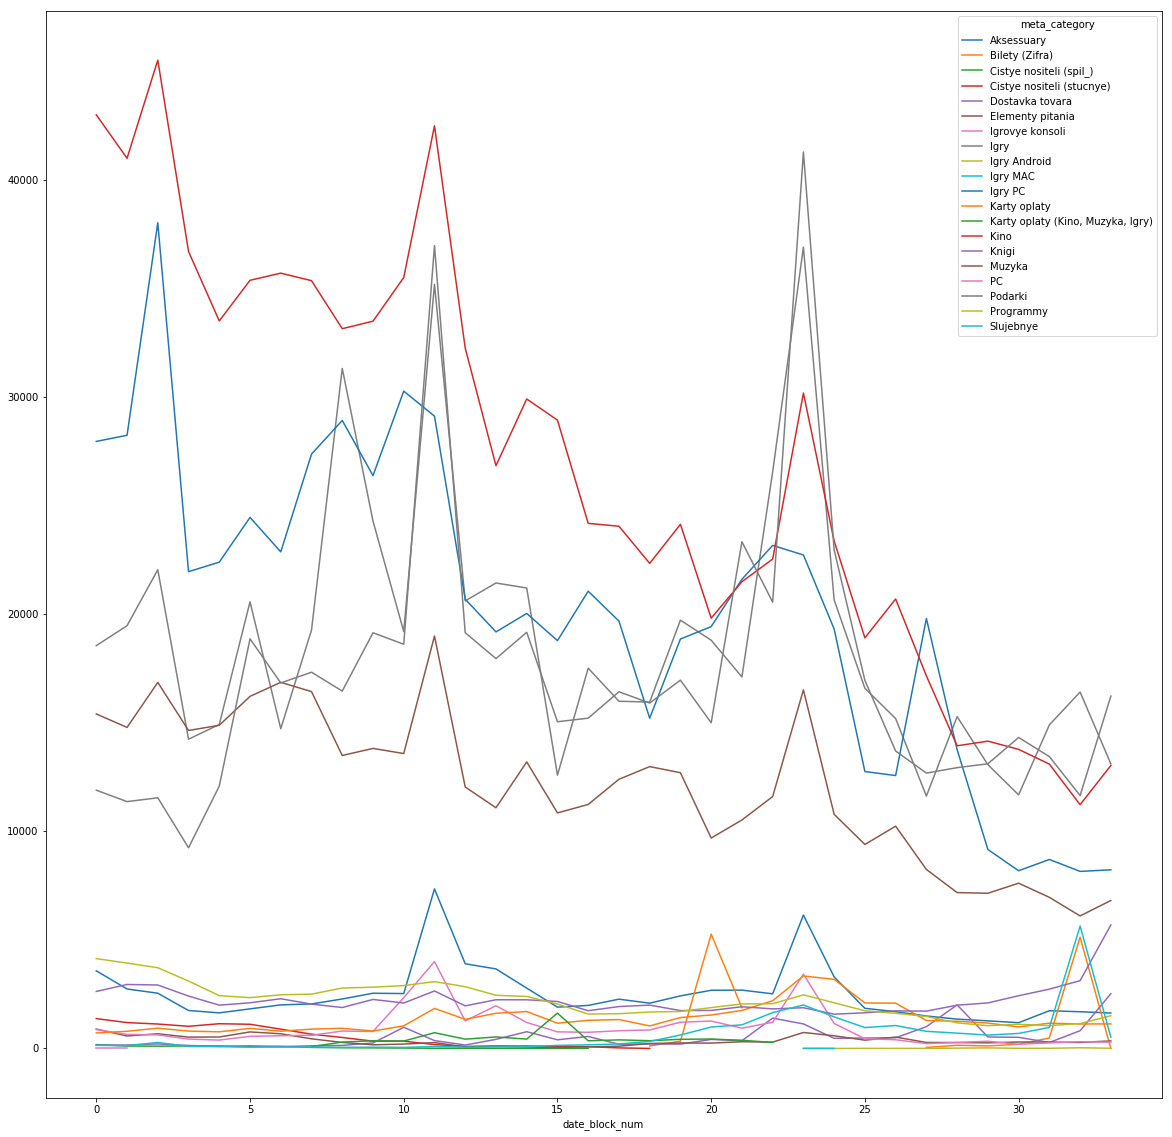

In [99]:
train_sales.groupby(["date_block_num","meta_category"]).sum()["item_cnt_day"].unstack().plot(figsize=(20,20))

# remove items having negative count

In [7]:
clean_train_sales=train_sales[train_sales['item_cnt_day']>=0]
clean_train_sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0


### groupby month

In [8]:
final_train=clean_train_sales.groupby(["date_block_num","shop_id","item_id"], as_index=False).agg({'item_cnt_day':'sum','item_price':'mean','date':'first'})
final_train.columns=final_train.columns.str.replace("item_cnt_day","item_cnt_month")
final_train.head()

,date_block_num,shop_id,item_id,item_cnt_month,item_price,date
0,0,0,32,6.0,221.0,03.01.2013
1,0,0,33,3.0,347.0,03.01.2013
2,0,0,35,1.0,247.0,31.01.2013
3,0,0,43,1.0,221.0,31.01.2013
4,0,0,51,2.0,128.5,13.01.2013


# extract time features:

### add month and year to the train set:

In [9]:
final_train['date']=pd.to_datetime(final_train.date,format='%d.%m.%Y')
final_train['month']=final_train['date'].apply(lambda x : x.month)
final_train['year']=final_train['date'].apply(lambda x : x.year)
final_train.head()

,date_block_num,shop_id,item_id,item_cnt_month,item_price,date,month,year
0,0,0,32,6.0,221.0,2013-01-03,1,2013
1,0,0,33,3.0,347.0,2013-01-03,1,2013
2,0,0,35,1.0,247.0,2013-01-31,1,2013
3,0,0,43,1.0,221.0,2013-01-31,1,2013
4,0,0,51,2.0,128.5,2013-01-13,1,2013


### add month and year to the test set

In [10]:
test_sales['month']=11
test_sales['year']=2015
test_sales.head()

,ID,shop_id,item_id,month,year
0,0,5,5037,11,2015
1,1,5,5320,11,2015
2,2,5,5233,11,2015
3,3,5,5232,11,2015
4,4,5,5268,11,2015


# add item category to train set:

# add to train set

In [11]:
final_train_with_cat=final_train.merge(items,on="item_id")
final_train_with_cat.head()

,date_block_num,shop_id,item_id,item_cnt_month,item_price,date,month,year,item_name,item_category_id
0,0,0,32,6.0,221.0,2013-01-03,1,2013,1+1,40
1,0,1,32,7.0,221.0,2013-01-05,1,2013,1+1,40
2,0,3,32,3.0,349.0,2013-01-05,1,2013,1+1,40
3,0,4,32,2.0,349.0,2013-01-26,1,2013,1+1,40
4,0,6,32,8.0,349.0,2013-01-03,1,2013,1+1,40


### add item category to test set:

In [12]:
test_sales=pd.read_csv('data/test.csv.gz')
test_sales=test_sales.merge(items,on="item_id")
test_sales.sort_values(by=["ID"],inplace=True)
test_sales.reset_index(drop=True,inplace=True)
test_sales.drop(["item_name"],axis=1,inplace=True)
test_sales['month']=11
test_sales['year']=2015
test_sales.head()

,ID,shop_id,item_id,item_category_id,month,year
0,0,5,5037,19,11,2015
1,1,5,5320,55,11,2015
2,2,5,5233,19,11,2015
3,3,5,5232,23,11,2015
4,4,5,5268,20,11,2015


# select relevant columns for train and test

In [13]:
all_cols=["date_block_num",'shop_id','item_id','item_category_id','month','year','item_cnt_month']
train_cols=['shop_id','item_id','item_category_id','month','year']
target_col='item_cnt_month'

In [14]:
final_train_with_cat=final_train_with_cat[all_cols]
print(final_train_with_cat.shape)
final_train_with_cat.head()

(1608226, 7)


,date_block_num,shop_id,item_id,item_category_id,month,year,item_cnt_month
0,0,0,32,40,1,2013,6.0
1,0,1,32,40,1,2013,7.0
2,0,3,32,40,1,2013,3.0
3,0,4,32,40,1,2013,2.0
4,0,6,32,40,1,2013,8.0


# Train a model

In [15]:
final_train=final_train_with_cat

In [16]:
train_set=final_train[final_train.date_block_num<33]
validation_set=final_train[final_train.date_block_num==33]

In [17]:
train_x=train_set[train_cols]
train_y=train_set[target_col]
val_x=validation_set[train_cols]
val_y=validation_set[target_col]

In [20]:
%%time
from sklearn.ensemble import RandomForestRegressor
rf_regr = RandomForestRegressor(random_state=0, n_estimators=400,n_jobs=-1)
rf_regr.fit(train_x,train_y)

CPU times: user 38min 32s, sys: 7.01 s, total: 38min 39s
Wall time: 9min 44s


In [21]:
preds=rf_regr.predict(val_x)

In [22]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(val_y, np.rint(preds)))

12.953113928037821

# train on the whole data:

In [23]:
X=final_train[train_cols]
y=final_train[target_col]

In [35]:
y.clip(0,20,inplace=True)

In [36]:
%%time
rf_regr = RandomForestRegressor(random_state=0, n_estimators=300,n_jobs=-1)
rf_regr.fit(X,y)

CPU times: user 29min 31s, sys: 4.16 s, total: 29min 35s
Wall time: 7min 27s


In [37]:
test_sales.head()

,ID,shop_id,item_id,item_category_id,month,year
0,0,5,5037,19,11,2015
1,1,5,5320,55,11,2015
2,2,5,5233,19,11,2015
3,3,5,5232,23,11,2015
4,4,5,5268,20,11,2015


In [ ]:
# to run

In [38]:
preds=rf_regr.predict(test_sales[train_cols])

In [27]:
np.rint(preds)[:20]

array([1., 4., 1., 1., 1., 1., 2., 1., 4., 1., 3., 2., 1., 1., 3., 4., 1.,
       1., 2., 1.])

In [39]:
result=pd.DataFrame({'ID':test_sales['ID'],'item_cnt_month':np.rint(preds)})
result.to_csv('clipped_prediction_with_item_cat_and_time.csv',index=False)

In [44]:
result.head()

,ID,item_cnt_month
0,0,1.0
1,1,4.0
2,2,1.0
3,3,1.0
4,4,1.0


In [41]:
pd.read_csv('clipped_prediction_with_item_cat_and_time.csv').head()

,ID,item_cnt_month
0,0,1.0
1,1,4.0
2,2,1.0
3,3,1.0
4,4,1.0
